In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassandra23-ps-2/dataset/sample_submissions.csv
/kaggle/input/cassandra23-ps-2/dataset/train_data.csv
/kaggle/input/cassandra23-ps-2/dataset/test_data.csv


In [3]:
df = pd.read_csv(r"/kaggle/input/cassandra23-ps-2/dataset/train_data.csv")
tt = pd.read_csv(r"/kaggle/input/cassandra23-ps-2/dataset/test_data.csv")

In [4]:
tt.columns

Index(['UID', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [5]:
df

,UID,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
0,lWYYrbNEdf,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,trip-153697819865649878,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,...,2018-09-15 04:45:23,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,3.292773,100.0
1,iNJcHQlPCm,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153832006897106333,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,...,2018-10-01 05:38:30,81.388109,227.479029,NaN,3.625248,68.517914,18.787231,34.612259,4.277350,61.0
2,U6N0M43qwR,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153774094663572416,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,...,2018-09-24 09:21:30,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,5.322072,69.0
3,RrJUneuYNj,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153750670483274503,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,...,2018-09-22 14:09:17,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,4.265799,300.0
4,7QLdD7iRC9,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,trip-153723305402762987,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,...,2018-09-18 12:14:05,379.389280,NaN,NaN,1.998790,46.571301,22.671495,26.971844,3.553652,286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,dNuV95njhn,2018-09-29 12:35:30.065739,thanos::sroute:ace9e650-93bd-49ab-9400-8ed7a29...,FTL,trip-153822453006548340,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND585104AAA,Gulbarga_Nehrugnj_I (Karnataka),2018-09-29 12:35:30.065739,...,2018-09-29 20:08:31,135.001150,NaN,1392.622148,1.950803,55.856356,39.233287,46.999351,1.383605,92.0
72154,ZSrzBfWx77,2018-09-22 11:00:33.571928,thanos::sroute:34b3abb5-f538-4f43-bbeb-5b12c1a...,Carting,trip-153761403357161860,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560083AAB,Bengaluru_Bnnrghta_L (Karnataka),2018-09-22 11:00:33.571928,...,2018-09-22 13:11:21,74.245265,374.255819,NaN,1.927801,35.976514,13.607794,15.139818,1.456469,30.0
72155,XsIYBRVK2V,2018-09-14 23:01:12.630742,thanos::sroute:16dbdb8b-1ca6-4d26-a45c-18d378e...,FTL,trip-153696607263047584,IND629179AAA,Marthandam_Nallur_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-09-15 04:20:06.629681,...,2018-09-15 06:53:24,54.097087,895.612578,902.191591,2.148569,44.101033,23.355458,27.510588,2.346207,74.0
72156,6YwMOShK5E,2018-09-22 06:11:41.998188,thanos::sroute:23372931-5898-4276-970b-0df5070...,FTL,trip-153759670199790692,IND110037AAM,Delhi_Airport_H (Delhi),IND282001AAA,Agra_Idgah_P (Uttar Pradesh),2018-09-22 06:11:41.998188,...,2018-09-22 15:42:27,99.918631,NaN,1393.905281,2.206373,37.771823,18.740087,29.929128,2.499566,122.0


In [6]:
df['trip_uuid'].value_counts()

trip-153689939954743811    56
trip-153846035308581166    56
trip-153741795740530104    56
trip-153750670483274503    55
trip-153819749763881430    54
                           ..
trip-153684758182048957     1
trip-153788048470099142     1
trip-153850313832185205     1
trip-153787939890361711     1
trip-153775443915828230     1
Name: trip_uuid, Length: 13535, dtype: int64

In [7]:
def extract_numerical_part(trip_id):
    return trip_id.split('-')[1]

# apply the function on the entire trip_id column
df['numerical_part'] = df['trip_uuid'].apply(extract_numerical_part)

In [8]:
def extract_numerical_part(trip_id):
    return trip_id.split('-')[1]

# apply the function on the entire trip_id column
tt['numerical_part'] = tt['trip_uuid'].apply(extract_numerical_part)

In [9]:
df.corr()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
start_scan_to_end_scan,1.000000,0.294295,0.773168,0.765404,0.572010,0.573307,-0.021593,0.089647,0.203742,0.277770,-0.023314,0.774909
is_cutoff,0.294295,1.000000,0.186803,0.185524,0.128636,0.136089,-0.113993,-0.005426,0.192595,0.223086,-0.112467,0.164992
cutoff_factor,0.773168,0.186803,1.000000,0.989353,0.735757,0.738855,-0.063342,0.046462,0.150077,0.215535,-0.033546,0.979045
actual_distance_to_destination,0.765404,0.185524,0.989353,1.000000,0.727968,0.731005,-0.062711,0.046220,0.149600,0.214109,-0.032893,0.968574
osrm_time,0.572010,0.128636,0.735757,0.727968,1.000000,0.545686,-0.054089,0.034890,0.122186,0.161373,-0.026080,0.721952
osrm_distance,0.573307,0.136089,0.738855,0.731005,0.545686,1.000000,-0.048434,0.032852,0.112278,0.159805,-0.026512,0.725394
factor,-0.021593,-0.113993,-0.063342,-0.062711,-0.054089,-0.048434,1.000000,0.483292,-0.047380,-0.032232,0.511604,0.032473
segment_actual_time,0.089647,-0.005426,0.046462,0.046220,0.034890,0.032852,0.483292,1.000000,0.466988,0.484160,0.461917,0.120842
segment_osrm_time,0.203742,0.192595,0.150077,0.149600,0.122186,0.112278,-0.047380,0.466988,1.000000,0.922130,-0.069188,0.163041
segment_osrm_distance,0.277770,0.223086,0.215535,0.214109,0.161373,0.159805,-0.032232,0.484160,0.922130,1.000000,-0.058539,0.226091


In [10]:
from sklearn.linear_model import LinearRegression

# separate the dataset into rows with non-missing osrm_time values and rows with missing osrm_time values
train_data = df[df['osrm_time'].notnull()]
test_data = df[df['osrm_time'].isnull()]

# define the features to use in the regression model
features = ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time']

# create the regression model
model = LinearRegression()

# train the model using the training data
model.fit(train_data[features], train_data['osrm_time'])

# use the trained model to predict the missing values in the test data
predictions = model.predict(test_data[features])

# fill in the missing values in the original dataset with the predicted values
df.loc[df['osrm_time'].isnull(), 'osrm_time'] = predictions


In [11]:
df['osrm_distance'].isnull().value_counts()

False    57726
True     14432
Name: osrm_distance, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression

# separate the dataset into rows with non-missing osrm_time values and rows with missing osrm_time values
train_data = df[df['osrm_distance'].notnull()]
test_data = df[df['osrm_distance'].isnull()]

# define the features to use in the regression model
features = ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time']

# create the regression model
model = LinearRegression()

# train the model using the training data
model.fit(train_data[features], train_data['osrm_distance'])

# use the trained model to predict the missing values in the test data
predictions = model.predict(test_data[features])

# fill in the missing values in the original dataset with the predicted values
df.loc[df['osrm_distance'].isnull(), 'osrm_distance'] = predictions


In [13]:
# do the same on testing dataset tt ---> osrm_distance

In [14]:
df['od_start_time']

0        2018-09-15 02:23:18.656742
1        2018-09-30 22:38:13.903069
2        2018-09-24 03:56:37.016232
3        2018-09-22 10:08:32.593022
4        2018-09-18 01:10:49.936747
                    ...            
72153    2018-09-29 12:35:30.065739
72154    2018-09-22 11:00:33.571928
72155    2018-09-15 04:20:06.629681
72156    2018-09-22 06:11:41.998188
72157    2018-09-13 05:19:46.622296
Name: od_start_time, Length: 72158, dtype: object

In [15]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])

# extract date and time features

df['start_month'] = df['od_start_time'].dt.month
df['start_day'] = df['od_start_time'].dt.day

# extract hour, minute, and second components from datetime object
df['start_hour'] = df['od_start_time'].dt.hour
df['start_minute'] = df['od_start_time'].dt.minute

# show final dataframe
#print(df)

In [16]:
# do the same on tt here
tt['od_start_time'] = pd.to_datetime(tt['od_start_time'])

# extract date and time features

tt['start_month'] = tt['od_start_time'].dt.month
tt['start_day'] = tt['od_start_time'].dt.day

# extract hour, minute, and second components from datetime object
tt['start_hour'] = tt['od_start_time'].dt.hour
tt['start_minute'] = tt['od_start_time'].dt.minute


In [17]:
df['start_hour'].head()

0     2
1    22
2     3
3    10
4     1
Name: start_hour, dtype: int64

In [18]:
df.corr()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time,start_month,start_day,start_hour,start_minute
start_scan_to_end_scan,1.000000,0.294295,0.773168,0.765404,0.600548,0.600760,-0.021593,0.089647,0.203742,0.277770,-0.023314,0.774909,0.005810,0.014581,0.115750,-0.007839
is_cutoff,0.294295,1.000000,0.186803,0.185524,0.137399,0.143339,-0.113993,-0.005426,0.192595,0.223086,-0.112467,0.164992,-0.000568,0.000473,0.070733,-0.004576
cutoff_factor,0.773168,0.186803,1.000000,0.989353,0.771962,0.774447,-0.063342,0.046462,0.150077,0.215535,-0.033546,0.979045,0.009035,0.006089,0.077807,-0.011113
actual_distance_to_destination,0.765404,0.185524,0.989353,1.000000,0.763781,0.766222,-0.062711,0.046220,0.149600,0.214109,-0.032893,0.968574,0.008609,0.006198,0.076791,-0.010512
osrm_time,0.600548,0.137399,0.771962,0.763781,1.000000,0.599450,-0.054268,0.035085,0.126303,0.172515,-0.027616,0.757554,0.006760,0.003790,0.061466,-0.006994
osrm_distance,0.600760,0.143339,0.774447,0.766222,0.599450,1.000000,-0.050498,0.034548,0.116147,0.166426,-0.026711,0.760397,0.008385,0.004525,0.065644,-0.008031
factor,-0.021593,-0.113993,-0.063342,-0.062711,-0.054268,-0.050498,1.000000,0.483292,-0.047380,-0.032232,0.511604,0.032473,-0.002853,0.010370,-0.048289,-0.009474
segment_actual_time,0.089647,-0.005426,0.046462,0.046220,0.035085,0.034548,0.483292,1.000000,0.466988,0.484160,0.461917,0.120842,-0.008070,0.010428,-0.012034,-0.007203
segment_osrm_time,0.203742,0.192595,0.150077,0.149600,0.126303,0.116147,-0.047380,0.466988,1.000000,0.922130,-0.069188,0.163041,-0.005415,0.005149,0.021853,0.001874
segment_osrm_distance,0.277770,0.223086,0.215535,0.214109,0.172515,0.166426,-0.032232,0.484160,0.922130,1.000000,-0.058539,0.226091,-0.005189,0.007464,0.033430,-0.001669


In [19]:
from sklearn.linear_model import LinearRegression

# separate the dataset into rows with non-missing osrm_time values and rows with missing osrm_time values
train_data = df[df['factor'].notnull()]
test_data = df[df['factor'].isnull()]

# define the features to use in the regression model
features = ['segment_actual_time','is_cutoff','actual_time']

# create the regression model
model = LinearRegression()

# train the model using the training data
model.fit(train_data[features], train_data['factor'])

# use the trained model to predict the missing values in the test data
predictions = model.predict(test_data[features])

# fill in the missing values in the original dataset with the predicted values
df.loc[df['factor'].isnull(), 'factor'] = predictions


In [20]:
# do the same on tt 

In [21]:
from sklearn.linear_model import LinearRegression

# separate the dataset into rows with non-missing osrm_time values and rows with missing osrm_time values
train_data = df[df['segment_factor'].notnull()]
test_data = df[df['segment_factor'].isnull()]

# define the features to use in the regression model
features = ['segment_actual_time','is_cutoff','actual_time', 'factor']

# create the regression model
model = LinearRegression()

# train the model using the training data
model.fit(train_data[features], train_data['segment_factor'])

# use the trained model to predict the missing values in the test data
predictions = model.predict(test_data[features])

# fill in the missing values in the original dataset with the predicted values
df.loc[df['segment_factor'].isnull(), 'segment_factor'] = predictions

In [22]:
# do the same on tt

In [23]:
df['cutoff_timestamp'].head()


0    2018-09-15 04:45:23
1    2018-10-01 05:38:30
2    2018-09-24 09:21:30
3    2018-09-22 14:09:17
4    2018-09-18 12:14:05
Name: cutoff_timestamp, dtype: object

In [24]:
df1 = df.copy()
tt1 = tt.copy()

In [25]:
tt1 = tt.copy()

In [26]:
df1['cutoff_timestamp'] = pd.to_datetime(df1['cutoff_timestamp'])

# extract date and time features

df1['cutoff_month'] = df1['cutoff_timestamp'].dt.month
df1['cutoff_day'] = df1['cutoff_timestamp'].dt.day

# extract hour, minute, and second components from datetime object
df1['cutoff_hour'] = df1['cutoff_timestamp'].dt.hour
df1['cutoff_minute'] = df1['cutoff_timestamp'].dt.minute


In [27]:
#do the same on tt1
tt1['cutoff_timestamp'] = pd.to_datetime(tt1['cutoff_timestamp'])

# extract date and time features

tt1['cutoff_month'] = tt1['cutoff_timestamp'].dt.month
tt1['cutoff_day'] = tt1['cutoff_timestamp'].dt.day

# extract hour, minute, and second components from datetime object
tt1['cutoff_hour'] = tt1['cutoff_timestamp'].dt.hour
tt1['cutoff_minute'] = tt1['cutoff_timestamp'].dt.minute

In [28]:
df1.corr()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time,start_month,start_day,start_hour,start_minute,cutoff_month,cutoff_day,cutoff_hour,cutoff_minute
start_scan_to_end_scan,1.000000,0.294295,0.773168,0.765404,0.600548,0.600760,-0.021347,0.089647,0.203742,0.277770,-0.023397,0.774909,0.005810,0.014581,0.115750,-0.007839,0.051209,0.001640,0.141833,0.000245
is_cutoff,0.294295,1.000000,0.186803,0.185524,0.137399,0.143339,-0.114841,-0.005426,0.192595,0.223086,-0.113506,0.164992,-0.000568,0.000473,0.070733,-0.004576,0.014718,-0.002462,0.092175,-0.010649
cutoff_factor,0.773168,0.186803,1.000000,0.989353,0.771962,0.774447,-0.062722,0.046462,0.150077,0.215535,-0.034342,0.979045,0.009035,0.006089,0.077807,-0.011113,0.025492,0.003488,0.099737,0.003813
actual_distance_to_destination,0.765404,0.185524,0.989353,1.000000,0.763781,0.766222,-0.062095,0.046220,0.149600,0.214109,-0.033729,0.968574,0.008609,0.006198,0.076791,-0.010512,0.024960,0.003538,0.098505,0.004497
osrm_time,0.600548,0.137399,0.771962,0.763781,1.000000,0.599450,-0.053969,0.035085,0.126303,0.172515,-0.028344,0.757554,0.006760,0.003790,0.061466,-0.006994,0.019261,0.002556,0.076025,0.000577
osrm_distance,0.600760,0.143339,0.774447,0.766222,0.599450,1.000000,-0.050128,0.034548,0.116147,0.166426,-0.026964,0.760397,0.008385,0.004525,0.065644,-0.008031,0.019445,0.004261,0.079177,-0.001677
factor,-0.021347,-0.114841,-0.062722,-0.062095,-0.053969,-0.050128,1.000000,0.487224,-0.044578,-0.030425,0.519301,0.032746,-0.002969,0.010624,-0.048233,-0.009208,-0.005711,0.010144,-0.035102,-0.001670
segment_actual_time,0.089647,-0.005426,0.046462,0.046220,0.035085,0.034548,0.487224,1.000000,0.466988,0.484160,0.466804,0.120842,-0.008070,0.010428,-0.012034,-0.007203,-0.005932,0.009051,0.002661,0.000021
segment_osrm_time,0.203742,0.192595,0.150077,0.149600,0.126303,0.116147,-0.044578,0.466988,1.000000,0.922130,-0.066791,0.163041,-0.005415,0.005149,0.021853,0.001874,0.003712,0.002333,0.051852,0.000931
segment_osrm_distance,0.277770,0.223086,0.215535,0.214109,0.172515,0.166426,-0.030425,0.484160,0.922130,1.000000,-0.056078,0.226091,-0.005189,0.007464,0.033430,-0.001669,0.006534,0.004873,0.063269,0.001727


In [29]:
df2 = df.copy()
tt2 = tt.copy()

In [30]:
tt2 = tt.copy()

In [31]:
df1 = df1.drop(['start_minute', 'cutoff_minute'], axis = 1)

In [32]:
# do same with tt1
tt1 = tt1.drop(['start_minute', 'cutoff_minute'], axis = 1)

In [33]:
df1.corr()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time,start_month,start_day,start_hour,cutoff_month,cutoff_day,cutoff_hour
start_scan_to_end_scan,1.000000,0.294295,0.773168,0.765404,0.600548,0.600760,-0.021347,0.089647,0.203742,0.277770,-0.023397,0.774909,0.005810,0.014581,0.115750,0.051209,0.001640,0.141833
is_cutoff,0.294295,1.000000,0.186803,0.185524,0.137399,0.143339,-0.114841,-0.005426,0.192595,0.223086,-0.113506,0.164992,-0.000568,0.000473,0.070733,0.014718,-0.002462,0.092175
cutoff_factor,0.773168,0.186803,1.000000,0.989353,0.771962,0.774447,-0.062722,0.046462,0.150077,0.215535,-0.034342,0.979045,0.009035,0.006089,0.077807,0.025492,0.003488,0.099737
actual_distance_to_destination,0.765404,0.185524,0.989353,1.000000,0.763781,0.766222,-0.062095,0.046220,0.149600,0.214109,-0.033729,0.968574,0.008609,0.006198,0.076791,0.024960,0.003538,0.098505
osrm_time,0.600548,0.137399,0.771962,0.763781,1.000000,0.599450,-0.053969,0.035085,0.126303,0.172515,-0.028344,0.757554,0.006760,0.003790,0.061466,0.019261,0.002556,0.076025
osrm_distance,0.600760,0.143339,0.774447,0.766222,0.599450,1.000000,-0.050128,0.034548,0.116147,0.166426,-0.026964,0.760397,0.008385,0.004525,0.065644,0.019445,0.004261,0.079177
factor,-0.021347,-0.114841,-0.062722,-0.062095,-0.053969,-0.050128,1.000000,0.487224,-0.044578,-0.030425,0.519301,0.032746,-0.002969,0.010624,-0.048233,-0.005711,0.010144,-0.035102
segment_actual_time,0.089647,-0.005426,0.046462,0.046220,0.035085,0.034548,0.487224,1.000000,0.466988,0.484160,0.466804,0.120842,-0.008070,0.010428,-0.012034,-0.005932,0.009051,0.002661
segment_osrm_time,0.203742,0.192595,0.150077,0.149600,0.126303,0.116147,-0.044578,0.466988,1.000000,0.922130,-0.066791,0.163041,-0.005415,0.005149,0.021853,0.003712,0.002333,0.051852
segment_osrm_distance,0.277770,0.223086,0.215535,0.214109,0.172515,0.166426,-0.030425,0.484160,0.922130,1.000000,-0.056078,0.226091,-0.005189,0.007464,0.033430,0.006534,0.004873,0.063269


In [34]:
import hashlib

df1['source_center_hashed'] = df1['source_center'].apply(lambda x: int(hashlib.md5(x.encode('utf-8')).hexdigest(), 16) % 10**8)


In [35]:
import hashlib



# apply hashing to 'destination_name' column
#df1['destination_name_hashed'] = df1['destination_name'].apply(lambda x: int(hashlib.sha256(x.encode('utf-8')).hexdigest(), 16) % 10**6)
df1['destination_name_hashed'] = df1['destination_name'].apply(lambda x: int(hashlib.md5(x.encode('utf-8')).hexdigest(), 16) % 10**8)
# show final dataframe
#print(df)



In [36]:
import hashlib

tt1['source_center_hashed'] = tt1['source_center'].apply(lambda x: int(hashlib.md5(x.encode('utf-8')).hexdigest(), 16) % 10**8)


In [37]:
import hashlib

# apply hashing to 'destination_name' column
#df1['destination_name_hashed'] = df1['destination_name'].apply(lambda x: int(hashlib.sha256(x.encode('utf-8')).hexdigest(), 16) % 10**6)
tt1['destination_name_hashed'] = tt1['destination_name'].apply(lambda x: int(hashlib.md5(x.encode('utf-8')).hexdigest(), 16) % 10**8)
# show final dataframe


In [38]:
df1.corr()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time,start_month,start_day,start_hour,cutoff_month,cutoff_day,cutoff_hour,source_center_hashed,destination_name_hashed
start_scan_to_end_scan,1.000000,0.294295,0.773168,0.765404,0.600548,0.600760,-0.021347,0.089647,0.203742,0.277770,-0.023397,0.774909,0.005810,0.014581,0.115750,0.051209,0.001640,0.141833,0.207740,-0.124578
is_cutoff,0.294295,1.000000,0.186803,0.185524,0.137399,0.143339,-0.114841,-0.005426,0.192595,0.223086,-0.113506,0.164992,-0.000568,0.000473,0.070733,0.014718,-0.002462,0.092175,0.061395,-0.052920
cutoff_factor,0.773168,0.186803,1.000000,0.989353,0.771962,0.774447,-0.062722,0.046462,0.150077,0.215535,-0.034342,0.979045,0.009035,0.006089,0.077807,0.025492,0.003488,0.099737,0.187380,-0.087043
actual_distance_to_destination,0.765404,0.185524,0.989353,1.000000,0.763781,0.766222,-0.062095,0.046220,0.149600,0.214109,-0.033729,0.968574,0.008609,0.006198,0.076791,0.024960,0.003538,0.098505,0.184899,-0.086316
osrm_time,0.600548,0.137399,0.771962,0.763781,1.000000,0.599450,-0.053969,0.035085,0.126303,0.172515,-0.028344,0.757554,0.006760,0.003790,0.061466,0.019261,0.002556,0.076025,0.148072,-0.064245
osrm_distance,0.600760,0.143339,0.774447,0.766222,0.599450,1.000000,-0.050128,0.034548,0.116147,0.166426,-0.026964,0.760397,0.008385,0.004525,0.065644,0.019445,0.004261,0.079177,0.147602,-0.066958
factor,-0.021347,-0.114841,-0.062722,-0.062095,-0.053969,-0.050128,1.000000,0.487224,-0.044578,-0.030425,0.519301,0.032746,-0.002969,0.010624,-0.048233,-0.005711,0.010144,-0.035102,-0.021450,-0.012907
segment_actual_time,0.089647,-0.005426,0.046462,0.046220,0.035085,0.034548,0.487224,1.000000,0.466988,0.484160,0.466804,0.120842,-0.008070,0.010428,-0.012034,-0.005932,0.009051,0.002661,0.009882,-0.019732
segment_osrm_time,0.203742,0.192595,0.150077,0.149600,0.126303,0.116147,-0.044578,0.466988,1.000000,0.922130,-0.066791,0.163041,-0.005415,0.005149,0.021853,0.003712,0.002333,0.051852,0.045362,-0.054558
segment_osrm_distance,0.277770,0.223086,0.215535,0.214109,0.172515,0.166426,-0.030425,0.484160,0.922130,1.000000,-0.056078,0.226091,-0.005189,0.007464,0.033430,0.006534,0.004873,0.063269,0.051512,-0.058555


In [39]:
df1['trip_uuid'].value_counts()

trip-153689939954743811    56
trip-153846035308581166    56
trip-153741795740530104    56
trip-153750670483274503    55
trip-153819749763881430    54
                           ..
trip-153684758182048957     1
trip-153788048470099142     1
trip-153850313832185205     1
trip-153787939890361711     1
trip-153775443915828230     1
Name: trip_uuid, Length: 13535, dtype: int64

In [40]:
import pandas as pd

# create sample dataframe
#df = pd.DataFrame({'trip_uuid': [1234567890, 9876543210, 4567890123, 7890123456]})

# apply hash function to trip_uuid column
df1['trip_uuid_hashed'] = df1['trip_uuid'].apply(lambda x: hash(str(x)))

# show final dataframe
#print(df)


In [41]:
tt1['trip_uuid_hashed'] = tt1['trip_uuid'].apply(lambda x: hash(str(x)))

In [42]:
df1.corr()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,actual_time,start_month,start_day,start_hour,cutoff_month,cutoff_day,cutoff_hour,source_center_hashed,destination_name_hashed,trip_uuid_hashed
start_scan_to_end_scan,1.000000,0.294295,0.773168,0.765404,0.600548,0.600760,-0.021347,0.089647,0.203742,0.277770,...,0.774909,0.005810,0.014581,0.115750,0.051209,0.001640,0.141833,0.207740,-0.124578,-0.000625
is_cutoff,0.294295,1.000000,0.186803,0.185524,0.137399,0.143339,-0.114841,-0.005426,0.192595,0.223086,...,0.164992,-0.000568,0.000473,0.070733,0.014718,-0.002462,0.092175,0.061395,-0.052920,-0.003005
cutoff_factor,0.773168,0.186803,1.000000,0.989353,0.771962,0.774447,-0.062722,0.046462,0.150077,0.215535,...,0.979045,0.009035,0.006089,0.077807,0.025492,0.003488,0.099737,0.187380,-0.087043,-0.001839
actual_distance_to_destination,0.765404,0.185524,0.989353,1.000000,0.763781,0.766222,-0.062095,0.046220,0.149600,0.214109,...,0.968574,0.008609,0.006198,0.076791,0.024960,0.003538,0.098505,0.184899,-0.086316,-0.001990
osrm_time,0.600548,0.137399,0.771962,0.763781,1.000000,0.599450,-0.053969,0.035085,0.126303,0.172515,...,0.757554,0.006760,0.003790,0.061466,0.019261,0.002556,0.076025,0.148072,-0.064245,0.005865
osrm_distance,0.600760,0.143339,0.774447,0.766222,0.599450,1.000000,-0.050128,0.034548,0.116147,0.166426,...,0.760397,0.008385,0.004525,0.065644,0.019445,0.004261,0.079177,0.147602,-0.066958,0.002155
factor,-0.021347,-0.114841,-0.062722,-0.062095,-0.053969,-0.050128,1.000000,0.487224,-0.044578,-0.030425,...,0.032746,-0.002969,0.010624,-0.048233,-0.005711,0.010144,-0.035102,-0.021450,-0.012907,0.004946
segment_actual_time,0.089647,-0.005426,0.046462,0.046220,0.035085,0.034548,0.487224,1.000000,0.466988,0.484160,...,0.120842,-0.008070,0.010428,-0.012034,-0.005932,0.009051,0.002661,0.009882,-0.019732,-0.000074
segment_osrm_time,0.203742,0.192595,0.150077,0.149600,0.126303,0.116147,-0.044578,0.466988,1.000000,0.922130,...,0.163041,-0.005415,0.005149,0.021853,0.003712,0.002333,0.051852,0.045362,-0.054558,-0.009334
segment_osrm_distance,0.277770,0.223086,0.215535,0.214109,0.172515,0.166426,-0.030425,0.484160,0.922130,1.000000,...,0.226091,-0.005189,0.007464,0.033430,0.006534,0.004873,0.063269,0.051512,-0.058555,-0.009966


In [43]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the trip_uuid column
df1['trip_uuid_encoded'] = le.fit_transform(df['trip_uuid'])


In [44]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the trip_uuid column
df1['trip_uuid_encoded'] = le.fit_transform(df['trip_uuid'])

In [45]:

#tt
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the trip_uuid column
tt1['trip_uuid_encoded'] = le.fit_transform(tt1['trip_uuid'])

In [46]:
df1.corr()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,start_month,start_day,start_hour,cutoff_month,cutoff_day,cutoff_hour,source_center_hashed,destination_name_hashed,trip_uuid_hashed,trip_uuid_encoded
start_scan_to_end_scan,1.000000,0.294295,0.773168,0.765404,0.600548,0.600760,-0.021347,0.089647,0.203742,0.277770,...,0.005810,0.014581,0.115750,0.051209,0.001640,0.141833,0.207740,-0.124578,-0.000625,0.034813
is_cutoff,0.294295,1.000000,0.186803,0.185524,0.137399,0.143339,-0.114841,-0.005426,0.192595,0.223086,...,-0.000568,0.000473,0.070733,0.014718,-0.002462,0.092175,0.061395,-0.052920,-0.003005,0.001441
cutoff_factor,0.773168,0.186803,1.000000,0.989353,0.771962,0.774447,-0.062722,0.046462,0.150077,0.215535,...,0.009035,0.006089,0.077807,0.025492,0.003488,0.099737,0.187380,-0.087043,-0.001839,0.026404
actual_distance_to_destination,0.765404,0.185524,0.989353,1.000000,0.763781,0.766222,-0.062095,0.046220,0.149600,0.214109,...,0.008609,0.006198,0.076791,0.024960,0.003538,0.098505,0.184899,-0.086316,-0.001990,0.025710
osrm_time,0.600548,0.137399,0.771962,0.763781,1.000000,0.599450,-0.053969,0.035085,0.126303,0.172515,...,0.006760,0.003790,0.061466,0.019261,0.002556,0.076025,0.148072,-0.064245,0.005865,0.019115
osrm_distance,0.600760,0.143339,0.774447,0.766222,0.599450,1.000000,-0.050128,0.034548,0.116147,0.166426,...,0.008385,0.004525,0.065644,0.019445,0.004261,0.079177,0.147602,-0.066958,0.002155,0.023218
factor,-0.021347,-0.114841,-0.062722,-0.062095,-0.053969,-0.050128,1.000000,0.487224,-0.044578,-0.030425,...,-0.002969,0.010624,-0.048233,-0.005711,0.010144,-0.035102,-0.021450,-0.012907,0.004946,0.007755
segment_actual_time,0.089647,-0.005426,0.046462,0.046220,0.035085,0.034548,0.487224,1.000000,0.466988,0.484160,...,-0.008070,0.010428,-0.012034,-0.005932,0.009051,0.002661,0.009882,-0.019732,-0.000074,-0.002214
segment_osrm_time,0.203742,0.192595,0.150077,0.149600,0.126303,0.116147,-0.044578,0.466988,1.000000,0.922130,...,-0.005415,0.005149,0.021853,0.003712,0.002333,0.051852,0.045362,-0.054558,-0.009334,-0.005608
segment_osrm_distance,0.277770,0.223086,0.215535,0.214109,0.172515,0.166426,-0.030425,0.484160,0.922130,1.000000,...,-0.005189,0.007464,0.033430,0.006534,0.004873,0.063269,0.051512,-0.058555,-0.009966,-0.002097


In [47]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the trip_uuid column
df1['source_center_encoded'] = le.fit_transform(df['source_center'])

In [48]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the trip_uuid column
tt1['source_center_encoded'] = le.fit_transform(tt1['source_center'])

In [49]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the trip_uuid column
df1['destination_name_encoded'] = le.fit_transform(df1['destination_name'])

In [50]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the trip_uuid column
tt1['destination_name_encoded'] = le.fit_transform(tt1['destination_name'])

In [51]:
df3 = df1.copy()

In [52]:
tt3 = tt1.copy()

In [53]:
ohe_df = pd.get_dummies(df1['route_type'], prefix='route_type')

# concatenate the original DataFrame with the one-hot encoded DataFrame
df1 = pd.concat([df1, ohe_df], axis=1)

# drop the original 'route_type' column
df1.drop('route_type', axis=1, inplace=True)


In [54]:
ohe_df = pd.get_dummies(tt1['route_type'], prefix='route_type')

# concatenate the original DataFrame with the one-hot encoded DataFrame
tt1 = pd.concat([tt1, ohe_df], axis=1)

# drop the original 'route_type' column
tt1.drop('route_type', axis=1, inplace=True)


In [55]:
df3 = df1.copy()

In [56]:
tt3 = tt1.copy()

In [57]:
df1.columns

Index(['UID', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'numerical_part', 'start_month', 'start_day', 'start_hour',
       'cutoff_month', 'cutoff_day', 'cutoff_hour', 'source_center_hashed',
       'destination_name_hashed', 'trip_uuid_hashed', 'trip_uuid_encoded',
       'source_center_encoded', 'destination_name_encoded',
       'route_type_Carting', 'route_type_FTL'],
      dtype='object')

In [58]:
tt1.columns

Index(['UID', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'numerical_part',
       'start_month', 'start_day', 'start_hour', 'cutoff_month', 'cutoff_day',
       'cutoff_hour', 'source_center_hashed', 'destination_name_hashed',
       'trip_uuid_hashed', 'trip_uuid_encoded', 'source_center_encoded',
       'destination_name_encoded', 'route_type_Carting', 'route_type_FTL'],
      dtype='object')

In [59]:
df1['numerical_part'] = df1['numerical_part'].astype(int)

In [60]:
tt1['numerical_part'] = tt1['numerical_part'].astype(int)

In [61]:
df1['numerical_part'].corr(df1['actual_time'])

-0.006915499124012487

In [62]:
df1.drop(['UID', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'cutoff_timestamp', 'numerical_part', 'trip_uuid_encoded',
       'source_center_encoded', 'destination_name_encoded'], axis = 1)

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,start_day,start_hour,cutoff_month,cutoff_day,cutoff_hour,source_center_hashed,destination_name_hashed,trip_uuid_hashed,route_type_Carting,route_type_FTL
0,713.521495,True,44,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,...,15,2,9.0,15.0,4.0,90837186,71162489,4982841564511088849,0,1
1,902.759458,True,22,81.388109,227.479029,609.637258,3.625248,68.517914,18.787231,34.612259,...,30,22,10.0,1.0,5.0,82632197,21435434,-4227310537491262334,0,1
2,923.666146,True,22,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,...,24,3,9.0,24.0,9.0,6395069,89750725,6315311743385279434,0,1
3,705.451567,True,176,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,...,22,10,9.0,22.0,14.0,50407682,53603998,2295047155221334341,0,1
4,1109.682268,True,198,379.389280,611.485463,822.199394,1.998790,46.571301,22.671495,26.971844,...,18,1,9.0,18.0,12.0,57350179,12598992,7314666855951276734,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,1132.865742,True,66,135.001150,495.016217,1392.622148,1.950803,55.856356,39.233287,46.999351,...,29,12,9.0,29.0,20.0,255907,1328175,-5137793448410706751,0,1
72154,355.951299,True,18,74.245265,374.255819,603.657321,1.927801,35.976514,13.607794,15.139818,...,22,11,9.0,22.0,13.0,95637904,54409991,-2773009496152323420,1,0
72155,737.899031,True,44,54.097087,895.612578,902.191591,2.148569,44.101033,23.355458,27.510588,...,15,4,9.0,15.0,6.0,19158908,20641926,-8986616262073255114,0,1
72156,845.738186,True,88,99.918631,513.417972,1393.905281,2.206373,37.771823,18.740087,29.929128,...,22,6,9.0,22.0,15.0,47599694,73989737,-1646407943676383866,0,1


In [63]:
tt1.drop(['UID', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'cutoff_timestamp', 'numerical_part', 'trip_uuid_encoded',
       'source_center_encoded', 'destination_name_encoded'], axis = 1)

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,start_day,start_hour,cutoff_month,cutoff_day,cutoff_hour,source_center_hashed,destination_name_hashed,trip_uuid_hashed,route_type_Carting,route_type_FTL
0,86.0,True,27,27.637279,28.0,32.5395,1.428571,16.0,7.0,10.8152,...,20,3,9,20,4,39041366,1540745,-8994750456756579883,1,0
1,86.0,False,39,39.386040,44.0,54.2181,1.545455,6.0,5.0,3.9153,...,20,3,9,20,3,39041366,1540745,-8994750456756579883,1,0
2,109.0,True,9,10.403038,11.0,12.1171,1.363636,15.0,11.0,12.1171,...,20,4,9,20,6,32407661,50699570,-8994750456756579883,1,0
3,109.0,True,36,38.939167,39.0,47.1900,1.948718,10.0,10.0,11.3648,...,20,4,9,20,5,32407661,50699570,-8994750456756579883,1,0
4,302.0,True,22,23.194334,24.0,26.8622,1.583333,38.0,24.0,26.8622,...,23,6,9,23,11,38356424,24269377,-280777536947463892,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,427.0,True,9,11.080143,23.0,15.3398,1.913043,44.0,23.0,15.3398,...,20,16,9,20,22,22334686,21348763,-146423594337362524,1,0
72154,427.0,True,18,19.221595,35.0,34.4366,1.600000,12.0,26.0,16.9842,...,20,16,9,20,22,22334686,21348763,-146423594337362524,1,0
72155,427.0,True,27,27.964113,50.0,50.7273,1.400000,13.0,21.0,15.2911,...,20,16,9,20,22,22334686,21348763,-146423594337362524,1,0
72156,427.0,True,45,45.258278,60.0,67.9280,1.566667,12.0,12.0,8.1858,...,20,16,9,20,21,22334686,21348763,-146423594337362524,1,0


In [64]:
# do the same with tt1

In [65]:
import pandas as pd

# create sample dataframe
#df = pd.DataFrame({'is_cutoff': [True, False, True, True, False]})

# one-hot encode the "is_cutoff" column
is_cutoff_dummies = pd.get_dummies(df1['is_cutoff'], prefix='is_cutoff')

# concatenate the original dataframe with the one-hot encoded columns
df1 = pd.concat([df1, is_cutoff_dummies], axis=1)

# drop the original "is_cutoff" column
df1.drop('is_cutoff', axis=1, inplace=True)

#print(df)


In [66]:
is_cutoff_dummies = pd.get_dummies(tt1['is_cutoff'], prefix='is_cutoff')

# concatenate the original dataframe with the one-hot encoded columns
tt1 = pd.concat([tt1, is_cutoff_dummies], axis=1)

# drop the original "is_cutoff" column
tt1.drop('is_cutoff', axis=1, inplace=True)

In [67]:
df1.columns

Index(['UID', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'cutoff_factor', 'cutoff_timestamp',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'numerical_part', 'start_month', 'start_day', 'start_hour',
       'cutoff_month', 'cutoff_day', 'cutoff_hour', 'source_center_hashed',
       'destination_name_hashed', 'trip_uuid_hashed', 'trip_uuid_encoded',
       'source_center_encoded', 'destination_name_encoded',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True'],
      dtype='object')

In [68]:
df1 = df1.drop(['UID', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'cutoff_timestamp', 'numerical_part', 'trip_uuid_encoded',
       'source_center_encoded', 'destination_name_encoded'], axis = 1)

In [69]:
#do the same with tt1
tt1 = tt1.drop(['UID', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'cutoff_timestamp', 'numerical_part', 'trip_uuid_encoded',
       'source_center_encoded', 'destination_name_encoded'], axis = 1)

In [70]:
df1.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time', 'start_month',
       'start_day', 'start_hour', 'cutoff_month', 'cutoff_day', 'cutoff_hour',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True'],
      dtype='object')

In [71]:
tt1.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'start_month', 'start_day',
       'start_hour', 'cutoff_month', 'cutoff_day', 'cutoff_hour',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True'],
      dtype='object')

In [72]:
df5 = df1.copy()

In [73]:
tt5 = tt1.copy()

In [74]:
df1 = df1.drop(['cutoff_month', 'cutoff_day', 'cutoff_hour'], axis = 1)

In [75]:
tt1 = tt1.drop(['cutoff_month', 'cutoff_day', 'cutoff_hour'], axis = 1)

In [76]:
df1.corr()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,...,start_month,start_day,start_hour,source_center_hashed,destination_name_hashed,trip_uuid_hashed,route_type_Carting,route_type_FTL,is_cutoff_False,is_cutoff_True
start_scan_to_end_scan,1.000000,0.773168,0.765404,0.600548,0.600760,-0.021347,0.089647,0.203742,0.277770,-0.023397,...,0.005810,0.014581,0.115750,0.207740,-0.124578,-0.000625,-0.486068,0.486068,-0.294295,0.294295
cutoff_factor,0.773168,1.000000,0.989353,0.771962,0.774447,-0.062722,0.046462,0.150077,0.215535,-0.034342,...,0.009035,0.006089,0.077807,0.187380,-0.087043,-0.001839,-0.406609,0.406609,-0.186803,0.186803
actual_distance_to_destination,0.765404,0.989353,1.000000,0.763781,0.766222,-0.062095,0.046220,0.149600,0.214109,-0.033729,...,0.008609,0.006198,0.076791,0.184899,-0.086316,-0.001990,-0.402683,0.402683,-0.185524,0.185524
osrm_time,0.600548,0.771962,0.763781,1.000000,0.599450,-0.053969,0.035085,0.126303,0.172515,-0.028344,...,0.006760,0.003790,0.061466,0.148072,-0.064245,0.005865,-0.312442,0.312442,-0.137399,0.137399
osrm_distance,0.600760,0.774447,0.766222,0.599450,1.000000,-0.050128,0.034548,0.116147,0.166426,-0.026964,...,0.008385,0.004525,0.065644,0.147602,-0.066958,0.002155,-0.311474,0.311474,-0.143339,0.143339
factor,-0.021347,-0.062722,-0.062095,-0.053969,-0.050128,1.000000,0.487224,-0.044578,-0.030425,0.519301,...,-0.002969,0.010624,-0.048233,-0.021450,-0.012907,0.004946,0.109481,-0.109481,0.114841,-0.114841
segment_actual_time,0.089647,0.046462,0.046220,0.035085,0.034548,0.487224,1.000000,0.466988,0.484160,0.466804,...,-0.008070,0.010428,-0.012034,0.009882,-0.019732,-0.000074,-0.146174,0.146174,0.005426,-0.005426
segment_osrm_time,0.203742,0.150077,0.149600,0.126303,0.116147,-0.044578,0.466988,1.000000,0.922130,-0.066791,...,-0.005415,0.005149,0.021853,0.045362,-0.054558,-0.009334,-0.332248,0.332248,-0.192595,0.192595
segment_osrm_distance,0.277770,0.215535,0.214109,0.172515,0.166426,-0.030425,0.484160,0.922130,1.000000,-0.056078,...,-0.005189,0.007464,0.033430,0.051512,-0.058555,-0.009966,-0.386686,0.386686,-0.223086,0.223086
segment_factor,-0.023397,-0.034342,-0.033729,-0.028344,-0.026964,0.519301,0.466804,-0.066791,-0.056078,1.000000,...,-0.002826,0.004673,-0.024917,-0.006308,0.002285,0.008112,0.056224,-0.056224,0.113506,-0.113506


In [77]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df1.drop('actual_time', axis=1), df1['actual_time'], test_size=0.2, random_state=42)

# # Fit random forest model to training set
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Predict actual_time values for testing set
# y_pred = rf.predict(X_test)

# # Calculate root mean squared error of predictions
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print('RMSE:', rmse)


In [78]:
df_new = df.copy()

In [79]:
tt_new = tt.copy()

In [80]:
import pandas as pd

# create a sample dataframe

# convert date strings to datetime objects
tt_new['od_start_time'] = pd.to_datetime(tt_new['od_start_time'])
tt_new['od_end_time'] = pd.to_datetime(tt_new['od_end_time'])

# calculate time difference in seconds
tt1['time_diff_sec'] = (tt_new['od_end_time'] - tt_new['od_start_time']).dt.total_seconds()

# print the result
#print(df)


In [81]:
import pandas as pd

# create a sample dataframe

# convert date strings to datetime objects
df_new['od_start_time'] = pd.to_datetime(df_new['od_start_time'])
df_new['od_end_time'] = pd.to_datetime(df_new['od_end_time'])

# calculate time difference in seconds
df1['time_diff_sec'] = (df_new['od_end_time'] - df_new['od_start_time']).dt.total_seconds()

In [82]:
df1['time_diff_sec'].isna().sum()

720

In [83]:
df1.corr()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,...,start_day,start_hour,source_center_hashed,destination_name_hashed,trip_uuid_hashed,route_type_Carting,route_type_FTL,is_cutoff_False,is_cutoff_True,time_diff_sec
start_scan_to_end_scan,1.000000,0.773168,0.765404,0.600548,0.600760,-0.021347,0.089647,0.203742,0.277770,-0.023397,...,0.014581,0.115750,0.207740,-0.124578,-0.000625,-0.486068,0.486068,-0.294295,0.294295,0.986636
cutoff_factor,0.773168,1.000000,0.989353,0.771962,0.774447,-0.062722,0.046462,0.150077,0.215535,-0.034342,...,0.006089,0.077807,0.187380,-0.087043,-0.001839,-0.406609,0.406609,-0.186803,0.186803,0.783285
actual_distance_to_destination,0.765404,0.989353,1.000000,0.763781,0.766222,-0.062095,0.046220,0.149600,0.214109,-0.033729,...,0.006198,0.076791,0.184899,-0.086316,-0.001990,-0.402683,0.402683,-0.185524,0.185524,0.775374
osrm_time,0.600548,0.771962,0.763781,1.000000,0.599450,-0.053969,0.035085,0.126303,0.172515,-0.028344,...,0.003790,0.061466,0.148072,-0.064245,0.005865,-0.312442,0.312442,-0.137399,0.137399,0.608345
osrm_distance,0.600760,0.774447,0.766222,0.599450,1.000000,-0.050128,0.034548,0.116147,0.166426,-0.026964,...,0.004525,0.065644,0.147602,-0.066958,0.002155,-0.311474,0.311474,-0.143339,0.143339,0.608633
factor,-0.021347,-0.062722,-0.062095,-0.053969,-0.050128,1.000000,0.487224,-0.044578,-0.030425,0.519301,...,0.010624,-0.048233,-0.021450,-0.012907,0.004946,0.109481,-0.109481,0.114841,-0.114841,-0.021347
segment_actual_time,0.089647,0.046462,0.046220,0.035085,0.034548,0.487224,1.000000,0.466988,0.484160,0.466804,...,0.010428,-0.012034,0.009882,-0.019732,-0.000074,-0.146174,0.146174,0.005426,-0.005426,0.090990
segment_osrm_time,0.203742,0.150077,0.149600,0.126303,0.116147,-0.044578,0.466988,1.000000,0.922130,-0.066791,...,0.005149,0.021853,0.045362,-0.054558,-0.009334,-0.332248,0.332248,-0.192595,0.192595,0.206761
segment_osrm_distance,0.277770,0.215535,0.214109,0.172515,0.166426,-0.030425,0.484160,0.922130,1.000000,-0.056078,...,0.007464,0.033430,0.051512,-0.058555,-0.009966,-0.386686,0.386686,-0.223086,0.223086,0.281496
segment_factor,-0.023397,-0.034342,-0.033729,-0.028344,-0.026964,0.519301,0.466804,-0.066791,-0.056078,1.000000,...,0.004673,-0.024917,-0.006308,0.002285,0.008112,0.056224,-0.056224,0.113506,-0.113506,-0.024738


In [84]:
# # calculate the mean of actual_time column
# mean_actual_time = df1['time_diff_sec'].mean()

# # fill the missing values with mean
# df1['time_diff_sec'] = df1['time_diff_sec'].fillna(mean_actual_time)
from sklearn.linear_model import LinearRegression

# Split the dataset into two parts
train_data = df1[df1['time_diff_sec'].notnull()]
test_data = df1[df1['time_diff_sec'].isnull()]

# Choose appropriate features for the regression model
features = ['start_scan_to_end_scan', 'cutoff_factor','actual_distance_to_destination','osrm_time','osrm_distance', 'actual_time', 'route_type_FTL', 'route_type_Carting']

# Encode any categorical variables using one-hot encoding
train_X = pd.get_dummies(train_data[features])
train_y = train_data['time_diff_sec']

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(train_X, train_y)

# Use the trained model to predict the missing values
test_X = pd.get_dummies(test_data[features])
test_y = regressor.predict(test_X)

# Fill in the missing values with the predicted values
df1.loc[df1['time_diff_sec'].isnull(), 'time_diff_sec'] = test_y


In [85]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df1.drop('actual_time', axis=1), df1['actual_time'], test_size=0.2, random_state=42)

# # Fit random forest model to training set
# rf = RandomForestRegressor(n_estimators=300, random_state=42)
# rf.fit(X_train, y_train)

# # Predict actual_time values for testing set
# y_pred = rf.predict(X_test)

# # Calculate root mean squared error of predictions
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print('RMSE:', rmse)


In [86]:
df['od_end_time']

0        2018-09-15 06:33:35.824186
1        2018-10-01 06:48:37.637477
2        2018-09-24 11:15:00.826140
3        2018-09-22 19:17:22.242888
4        2018-09-18 17:58:48.449251
                    ...            
72153    2018-09-29 21:49:00.323701
72154    2018-09-22 13:46:54.235060
72155    2018-09-15 08:08:11.723169
72156    2018-09-22 18:10:26.705628
72157    2018-09-14 19:40:20.028790
Name: od_end_time, Length: 72158, dtype: object

In [87]:
cf = df1.copy()

In [88]:
tf = tt1.copy()

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Normalize all columns except 'actual_time'
cols_to_normalize = [col for col in cf.columns if col != 'actual_time']
cf[cols_to_normalize] = scaler.fit_transform(cf[cols_to_normalize])


In [90]:
cf


,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,...,start_day,start_hour,source_center_hashed,destination_name_hashed,trip_uuid_hashed,route_type_Carting,route_type_FTL,is_cutoff_False,is_cutoff_True,time_diff_sec
0,0.130023,0.018373,0.077147,0.239397,0.293058,0.032217,0.095338,0.012851,0.012967,0.025342,...,0.482759,0.086957,0.908328,0.711814,0.770159,0.0,1.0,0.0,1.0,0.083245
1,0.166141,0.006824,0.037242,0.065293,0.143580,0.043146,0.092466,0.011611,0.015761,0.028013,...,1.000000,0.956522,0.826211,0.214360,0.270836,0.0,1.0,0.0,1.0,0.134610
2,0.170132,0.006824,0.064611,0.119810,0.283451,0.053404,0.093060,0.015063,0.013601,0.030848,...,0.793103,0.130435,0.063208,0.897765,0.842398,0.0,1.0,0.0,1.0,0.123487
3,0.128483,0.087664,0.130784,0.154571,0.237692,0.034342,0.102584,0.012107,0.012656,0.027982,...,0.724138,0.434783,0.503699,0.536164,0.624442,0.0,1.0,0.0,1.0,0.147110
4,0.205635,0.099213,0.190845,0.186588,0.194902,0.022046,0.085809,0.014012,0.012282,0.026050,...,0.586207,0.043478,0.573181,0.125963,0.896577,0.0,1.0,0.0,1.0,0.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,0.210060,0.029921,0.064876,0.149799,0.332628,0.021423,0.088626,0.024250,0.021402,0.020163,...,0.965517,0.521739,0.001766,0.013213,0.221475,0.0,1.0,0.0,1.0,0.148111
72154,0.061776,0.004724,0.033560,0.111655,0.142137,0.021125,0.082596,0.008409,0.006893,0.020360,...,0.724138,0.478261,0.956375,0.544227,0.349680,1.0,0.0,0.0,1.0,0.065288
72155,0.134676,0.018373,0.023175,0.276335,0.214216,0.023989,0.085060,0.014435,0.012527,0.022774,...,0.482759,0.173913,0.190952,0.206422,0.012814,0.0,1.0,0.0,1.0,0.078496
72156,0.155258,0.041470,0.046793,0.155612,0.332938,0.024739,0.083140,0.011582,0.013628,0.023190,...,0.724138,0.260870,0.475596,0.740097,0.410758,0.0,1.0,0.0,1.0,0.183460


In [91]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Separate the target variable and features
# X = cf.drop('actual_time', axis=1)
# y = cf['actual_time']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train the Random Forest model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predict on the test set and calculate the RMSE
# y_pred = model.predict(X_test)
# rmse = mean_squared_error(y_test, y_pred, squared=False)

# print("RMSE value: ", rmse)


In [92]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Splitting the dataset into training and testing sets
# X = cf.drop('actual_time', axis=1)
# y = cf['actual_time']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Imputing missing values
# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

# # Scaling the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Creating the neural network model with 2 hidden layers, each containing 10 neurons
# mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# # Fitting the model to the training data
# mlp.fit(X_train, y_train)

# # Making predictions on the testing data
# y_pred = mlp.predict(X_test)

# # Calculating the mean squared error
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print("RMSE:", rmse)


In [93]:
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Separate the target variable and the features
# target_col = 'actual_time'
# X = cf.drop(columns=[target_col])
# y = cf[target_col]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the XGBoost regressor
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 200, seed = 42)

# # Train the model on the training set
# xg_reg.fit(X_train,y_train)

# # Make predictions on the test set
# preds = xg_reg.predict(X_test)

# # Calculate the RMSE value
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE value:", rmse)


In [94]:
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Separate the target variable and the features
# target_col = 'actual_time'
# X = df1.drop(columns=[target_col])
# y = df1[target_col]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the XGBoost regressor
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 5000, seed = 42)

# # Train the model on the training set
# xg_reg.fit(X_train,y_train)

# # Make predictions on the test set
# preds = xg_reg.predict(X_test)

# # Calculate the RMSE value
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE value:", rmse)


In [95]:
# gt_2 = xg_reg.predict(tt1)
# gt_2 = pd.DataFrame(gt_2)

In [96]:
# gt_2.rename(columns={0: "actual_time"}, inplace=True)
# submission_12 = pd.concat([gt_3, gt_2], axis=1)
# submission_12.reset_index(drop=True)
# submission_12.to_csv('submission_12.csv', index=False)

In [97]:
submission_12

NameError: name 'submission_12' is not defined

In [ ]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Split the data into training and testing sets
# X = df1.drop(columns=['actual_time'])
# y = df1['actual_time']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Define the base models
# rf_model = RandomForestRegressor(random_state=42)
# gb_model = GradientBoostingRegressor(random_state=42)
# # Create the ensemble model
# ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('gb', gb_model)])
# # Fit the ensemble model on the training data
# ensemble_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = ensemble_model.predict(X_test)
# # Calculate the RMSE
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print("RMSE:", rmse)


In [ ]:
# gt_1= xg_reg.predict(tt1)
# gt_1 = pd.DataFrame(gt_1)

In [ ]:
# gt_2.rename(columns={0: "actual_time"}, inplace=True)
# submission_12 = pd.concat([gt_3, gt_1], axis=1)
# submission_12.reset_index(drop=True)
# submission_12.to_csv('submission_12.csv', index=False)

In [ ]:
# gt_1

In [ ]:
gt_3 = tt['UID']

In [ ]:
gt_1.rename(columns={0: "actual_time"}, inplace=True)
submission_11 = pd.concat([gt_3, gt_1], axis=1)
submission_11.reset_index(drop=True)
submission_11.to_csv('submission_11.csv', index=False)

In [ ]:
submission_11

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# # define the hyperparameters to tune
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1],
# }
# X = cf.drop(columns=['actual_time'])
# y = cf['actual_time']
# # create the XGBoost regressor model
# xgb_model = xgb.XGBRegressor()

# # create the grid search object
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

# # train the grid search object on the training data
# grid_search.fit(X_train, y_train)

# # print the best hyperparameters
# print('Best parameters:', grid_search.best_params_)

# # use the best hyperparameters to create the final XGBoost model
# xgb_model_final = xgb.XGBRegressor(**grid_search.best_params_)

# # train the final model on the training data
# xgb_model_final.fit(X_train, y_train)

# # predict the target variable on the test data
# y_pred = xgb_model_final.predict(X_test)


In [ ]:
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# # Define the features and target variable
# features = df1.drop(['actual_time'], axis=1)
# target = df1['actual_time']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Define the model with optimal hyperparameters
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.05,
#                           max_depth = 5, n_estimators = 400)

# # Train the model on the training set
# xg_reg.fit(X_train,y_train)

# # Predict on the testing set
# y_pred = xg_reg.predict(X_test)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE:", rmse)


In [98]:
df1

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,...,start_day,start_hour,source_center_hashed,destination_name_hashed,trip_uuid_hashed,route_type_Carting,route_type_FTL,is_cutoff_False,is_cutoff_True,time_diff_sec
0,713.521495,44,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,3.292773,...,15,2,90837186,71162489,4982841564511088849,0,1,0,1,15017.167444
1,902.759458,22,81.388109,227.479029,609.637258,3.625248,68.517914,18.787231,34.612259,4.277350,...,30,22,82632197,21435434,-4227310537491262334,0,1,0,1,29423.734408
2,923.666146,22,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,5.322072,...,24,3,6395069,89750725,6315311743385279434,0,1,0,1,26303.809908
3,705.451567,176,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,4.265799,...,22,10,50407682,53603998,2295047155221334341,0,1,0,1,32929.649866
4,1109.682268,198,379.389280,611.485463,822.199394,1.998790,46.571301,22.671495,26.971844,3.553652,...,18,1,57350179,12598992,7314666855951276734,0,1,0,1,60478.512504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,1132.865742,66,135.001150,495.016217,1392.622148,1.950803,55.856356,39.233287,46.999351,1.383605,...,29,12,255907,1328175,-5137793448410706751,0,1,0,1,33210.257962
72154,355.951299,18,74.245265,374.255819,603.657321,1.927801,35.976514,13.607794,15.139818,1.456469,...,22,11,95637904,54409991,-2773009496152323420,1,0,0,1,9980.663132
72155,737.899031,44,54.097087,895.612578,902.191591,2.148569,44.101033,23.355458,27.510588,2.346207,...,15,4,19158908,20641926,-8986616262073255114,0,1,0,1,13685.093488
72156,845.738186,88,99.918631,513.417972,1393.905281,2.206373,37.771823,18.740087,29.929128,2.499566,...,22,6,47599694,73989737,-1646407943676383866,0,1,0,1,43124.707440


In [ ]:
dF = df1
dF.to_csv('df1.csv', index=False)

In [ ]:
df['od_start_time']

In [99]:
import pandas as pd

# Load the dataset
#df = pd.read_csv('your_dataset.csv')

# Convert the od_start_time column to a datetime format
df['od_start_time'] = pd.to_datetime(df['od_start_time'])

# Extract the day of the week from the od_start_time column and create a new column
df5['day_of_week'] = df['od_start_time'].dt.dayofweek

# One-hot encode the day_of_week column
df5 = pd.get_dummies(df5, columns=['day_of_week'], prefix='day')


In [105]:
import pandas as pd

# Load the dataset
#df = pd.read_csv('your_dataset.csv')

# Convert the od_start_time column to a datetime format
tt['od_start_time'] = pd.to_datetime(tt['od_start_time'])

# Extract the day of the week from the od_start_time column and create a new column
tt5['day_of_week'] = tt['od_start_time'].dt.dayofweek

# One-hot encode the day_of_week column
tt5 = pd.get_dummies(tt5, columns=['day_of_week'], prefix='day')

In [106]:
tt5.columns


Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'start_month', 'start_day',
       'start_hour', 'cutoff_month', 'cutoff_day', 'cutoff_hour',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'],
      dtype='object')

In [ ]:
df5.columns

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate the target variable and the features
target_col = 'actual_time'
X = df5.drop(columns=[target_col])
y = df5[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 400, seed = 42)

# Train the model on the training set
xg_reg.fit(X_train,y_train)

# Make predictions on the test set
preds = xg_reg.predict(X_test)

# Calculate the RMSE value
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE value:", rmse)

In [100]:
df6 = df5.drop(['cutoff_day', 'start_day'], axis = 1)

In [107]:
tt6 = tt5.drop(['cutoff_day', 'start_day'], axis = 1)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate the target variable and the features
target_col = 'actual_time'
X = df6.drop(columns=[target_col])
y = df6[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 400, seed = 42)

# Train the model on the training set
xg_reg.fit(X_train,y_train)

# Make predictions on the test set
preds = xg_reg.predict(X_test)

# Calculate the RMSE value
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE value:", rmse)

In [112]:
df6 = df6.drop(['start_month',
     'start_hour', 'cutoff_month', 'cutoff_hour', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6'], axis = 1)

In [113]:
df6.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True'],
      dtype='object')

In [108]:
tt6 = tt6.drop(['start_month',
     'start_hour', 'cutoff_month', 'cutoff_hour', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6'], axis = 1)

In [109]:
tt6.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'source_center_hashed',
       'destination_name_hashed', 'trip_uuid_hashed', 'route_type_Carting',
       'route_type_FTL', 'is_cutoff_False', 'is_cutoff_True'],
      dtype='object')

In [114]:
trip = df6.copy()

In [110]:
ttrip = tt6.copy()

In [115]:
trip['od_start_time'] = pd.to_datetime(df['od_start_time'], errors='coerce')

# check for invalid values
if trip['od_start_time'].isna().sum() > 0:
    # handle missing or invalid values here
    ...

trip['trip_year'] = trip['od_start_time'].dt.year
trip['trip_month'] = trip['od_start_time'].dt.month
trip['trip_hour'] = trip['od_start_time'].dt.hour
trip['trip_day'] = trip['od_start_time'].dt.day
trip['trip_week'] = trip['od_start_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['od_start_time'].dt.dayofweek


In [116]:
ttrip['od_start_time'] = pd.to_datetime(tt['od_start_time'], errors='coerce')

# check for invalid values
if ttrip['od_start_time'].isna().sum() > 0:
    # handle missing or invalid values here
    ...

ttrip['trip_year'] = ttrip['od_start_time'].dt.year
ttrip['trip_month'] = ttrip['od_start_time'].dt.month
ttrip['trip_hour'] = ttrip['od_start_time'].dt.hour
ttrip['trip_day'] = ttrip['od_start_time'].dt.day
ttrip['trip_week'] = ttrip['od_start_time'].dt.isocalendar().week
ttrip['trip_dayofweek'] = ttrip['od_start_time'].dt.dayofweek

In [ ]:
df['trip_creation_time'].isna().sum()

In [117]:
trip = trip.drop(['od_start_time'], axis = 1)


In [118]:
ttrip = ttrip.drop(['od_start_time'], axis = 1)

In [ ]:
trip.columns


In [119]:
df_ne = df.copy()

In [120]:
tt_ne = tt.copy()

In [267]:
abcd = tt1.copy()

In [268]:
abcd = abcd.drop(['start_month', 'start_day',
       'start_hour'], axis = 1)

In [247]:
tt_ne.shape[0]

72158

In [122]:
import pandas as pd

# create a sample dataframe

# convert date strings to datetime objects
df_ne['od_start_time'] = pd.to_datetime(df_ne['od_start_time'])
df_ne['od_end_time'] = pd.to_datetime(df_ne['od_end_time'])

# calculate time difference in seconds
trip['time_diff_sec'] = (df_ne['od_end_time'] - df_ne['od_start_time']).dt.total_seconds()

In [121]:
import pandas as pd

# create a sample dataframe

# convert date strings to datetime objects
tt_ne['od_start_time'] = pd.to_datetime(tt_ne['od_start_time'])
tt_ne['od_end_time'] = pd.to_datetime(tt_ne['od_end_time'])

# calculate time difference in seconds
ttrip['time_diff_sec'] = (tt_ne['od_end_time'] - tt_ne['od_start_time']).dt.total_seconds()

In [269]:
import pandas as pd

# create a sample dataframe

# convert date strings to datetime objects
tt_ne['od_start_time'] = pd.to_datetime(tt_ne['od_start_time'])
tt_ne['od_end_time'] = pd.to_datetime(tt_ne['od_end_time'])

# calculate time difference in seconds
abcd['time_diff_sec'] = (tt_ne['od_end_time'] - tt_ne['od_start_time']).dt.total_seconds()

In [270]:
abcd.shape[0]

72158

In [123]:
# num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
#             'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
#            'segment_osrm_time_sum', 'od_time_diff_hour']
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
        'osrm_distance', 'time_diff_sec']

<AxesSubplot:>

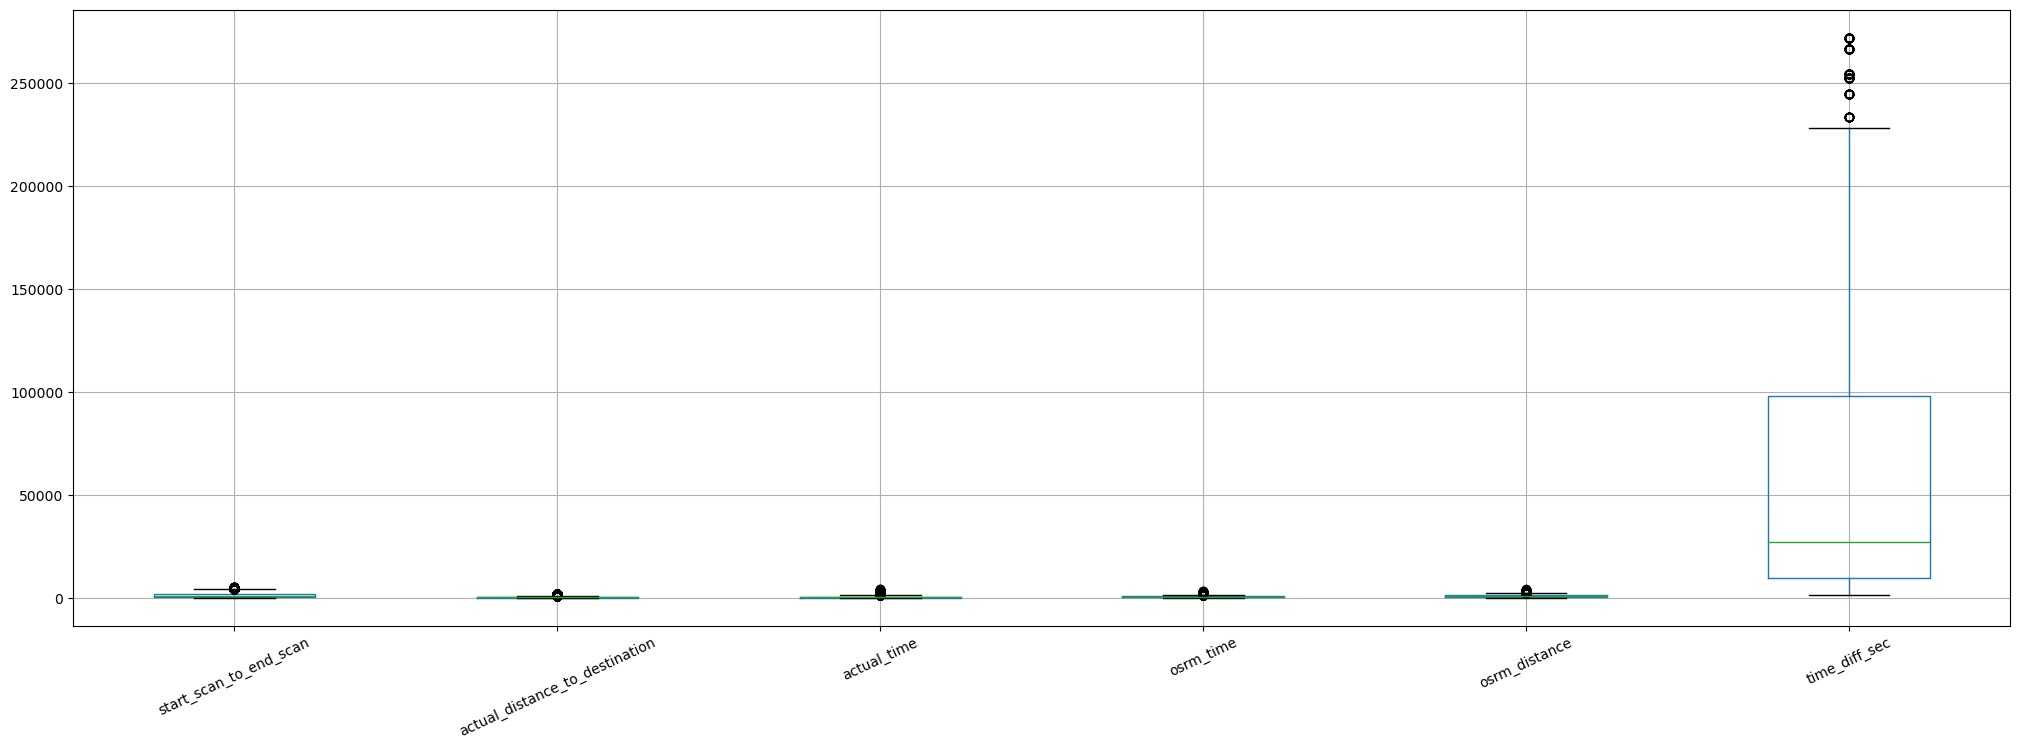

In [124]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [125]:
Q1 = trip['time_diff_sec'].quantile(0.25)
Q3 = trip['time_diff_sec'].quantile(0.75)
IQR = Q3 - Q1
trip = trip[~((trip['time_diff_sec'] < (Q1 - 1.5 * IQR)) |(trip['time_diff_sec'] > (Q3 + 1.5 * IQR)))]


In [126]:
Q1 = ttrip['time_diff_sec'].quantile(0.25)
Q3 = ttrip['time_diff_sec'].quantile(0.75)
IQR = Q3 - Q1
ttrip = ttrip[~((ttrip['time_diff_sec'] < (Q1 - 1.5 * IQR)) |(ttrip['time_diff_sec'] > (Q3 + 1.5 * IQR)))]


In [252]:
Q1 = abcd['time_diff_sec'].quantile(0.25)
Q3 = abcd['time_diff_sec'].quantile(0.75)
IQR = Q3 - Q1
abcd = abcd[~((abcd['time_diff_sec'] < (Q1 - 1.5 * IQR)) |(abcd['time_diff_sec'] > (Q3 + 1.5 * IQR)))]


In [271]:
abcd.shape[0]

72158

In [ ]:
trip.columns



In [129]:
trip1 = trip.copy()

In [127]:
ttrip1 = ttrip.copy()

In [246]:
ttrip.shape[0]

71972

In [ ]:
trip1['trip_week']

In [130]:
trip1['trip_week'] = trip1['trip_week'].astype(int)


In [273]:
abcd['trip_week'] = abcd['trip_week'].astype(int)

In [272]:
abcd['od_start_time'] = pd.to_datetime(tt['od_start_time'], errors='coerce')


    

abcd['trip_year'] = abcd['od_start_time'].dt.year
abcd['trip_month'] = abcd['od_start_time'].dt.month
abcd['trip_hour'] = abcd['od_start_time'].dt.hour
abcd['trip_day'] = abcd['od_start_time'].dt.day
abcd['trip_week'] = abcd['od_start_time'].dt.isocalendar().week
abcd['trip_dayofweek'] = abcd['od_start_time'].dt.dayofweek

In [131]:
ttrip1['trip_week'] = ttrip1['trip_week'].astype(int)

In [260]:
abcd['trip_week'] = abcd['trip_week'].astype(int)

In [ ]:
#tt

In [ ]:
trip=trip.drop([ 'trip_week'], axis = 1)

In [134]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate the target variable and the features
target_col = 'actual_time'
X = trip1.drop(columns=[target_col])
y = trip1[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 1500, seed = 42)

# Train the model on the training set
xg_reg.fit(X_train,y_train)

# Make predictions on the test set
preds = xg_reg.predict(X_test)

# Calculate the RMSE value
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE value:", rmse)


RMSE value: 39.817345669801156


In [ ]:
gt_4= xg_reg.predict(trip1)
gt_1 = pd.DataFrame(gt_1)

In [ ]:
gt_1.rename(columns={0: "actual_time"}, inplace=True)
submission_11 = pd.concat([gt_3, gt_1], axis=1)
submission_11.reset_index(drop=True)
submission_11.to_csv('submission_11.csv', index=False)

In [133]:
trip1.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True', 'trip_year', 'trip_month', 'trip_hour', 'trip_day',
       'trip_week', 'trip_dayofweek', 'time_diff_sec'],
      dtype='object')

In [135]:
trip1[['actual_distance_to_destination', 'osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,158.807515,1228.735753
1,81.388109,609.637258
2,134.486898,1188.943158
3,262.866674,999.421258
4,379.389280,822.199394
...,...,...
72153,135.001150,1392.622148
72154,74.245265,603.657321
72155,54.097087,902.191591
72156,99.918631,1393.905281


In [140]:
trip1[['actual_time', 'segment_actual_time']]

,actual_time,segment_actual_time
0,100.0,77.988686
1,61.0,68.517914
2,69.0,70.475386
3,300.0,101.876844
4,286.0,46.571301
...,...,...
72153,92.0,55.856356
72154,30.0,35.976514
72155,74.0,44.101033
72156,122.0,37.771823


In [137]:
tt[['actual_distance_to_destination', 'osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,27.637279,32.5395
1,39.386040,54.2181
2,10.403038,12.1171
3,38.939167,47.1900
4,23.194334,26.8622
...,...,...
72153,11.080143,15.3398
72154,19.221595,34.4366
72155,27.964113,50.7273
72156,45.258278,67.9280


In [151]:
ttrip1[['actual_distance_to_destination', 'osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,27.637279,32.5395
1,39.386040,54.2181
2,10.403038,12.1171
3,38.939167,47.1900
4,23.194334,26.8622
...,...,...
72153,11.080143,15.3398
72154,19.221595,34.4366
72155,27.964113,50.7273
72156,45.258278,67.9280


In [142]:
trip2 = trip1.drop(['osrm_distance', 'osrm_time'], axis = 1)

In [153]:
ttrip2 = ttrip1.drop(['osrm_distance', 'osrm_time'], axis = 1)

In [155]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate the target variable and the features
target_col = 'actual_time'
X = trip2.drop(columns=[target_col])
y = trip2[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 2000, seed = 42)

# Train the model on the training set
xg_reg.fit(X_train,y_train)

# Make predictions on the test set
preds = xg_reg.predict(X_test)

# Calculate the RMSE value
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE value:", rmse)

RMSE value: 38.26456931629818


In [144]:
ttrip.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'source_center_hashed',
       'destination_name_hashed', 'trip_uuid_hashed', 'route_type_Carting',
       'route_type_FTL', 'is_cutoff_False', 'is_cutoff_True', 'trip_year',
       'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek',
       'time_diff_sec'],
      dtype='object')

In [158]:
ttrip2 = ttrip2.dropna(axis=1, how='all')

In [245]:
ttrip2.shape[0]

71972

In [185]:
gt_3 = tt['UID']
gt_4= xg_reg.predict(ttrip2)
gt_4 = pd.DataFrame(gt_4)
gt_4.rename(columns={0: "actual_time"}, inplace=True)
submission_k = pd.concat([gt_3, gt_4], axis=1)
submission_k.reset_index(drop=True)
submission_k.to_csv('submission_k.csv', index=False)

In [160]:
submission_k

,UID,actual_time
0,XMsT9clviB,35.530098
1,1iUuyRUZ2Y,54.901733
2,wancwiAIU3,16.692617
3,1tIt8EwJjB,63.399132
4,W2vL6bJrjt,27.280853
...,...,...
72153,L5IrEpNBFb,NaN
72154,s5TDXjnN3s,NaN
72155,0croXy5yK5,NaN
72156,P0okvBa2Ik,NaN


In [152]:
trip1.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True', 'trip_year', 'trip_month', 'trip_hour', 'trip_day',
       'trip_week', 'trip_dayofweek', 'time_diff_sec'],
      dtype='object')

In [168]:
from scipy import stats
import numpy as np

# calculate z-scores for each column in df
z_scores = np.abs(stats.zscore(trip1[num_cols]))

# remove rows where any z-score exceeds threshold
threshold = 3
trip1_clean = trip1[(z_scores < threshold).all(axis=1)]


In [171]:
trip1.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True', 'trip_year', 'trip_month', 'trip_hour', 'trip_day',
       'trip_week', 'trip_dayofweek', 'time_diff_sec'],
      dtype='object')

In [172]:
trip1[['cutoff_factor', 'factor', 'segment_factor']]

,cutoff_factor,factor,segment_factor
0,44,2.782826,3.292773
1,22,3.625248,4.277350
2,22,4.415969,5.322072
3,176,2.946647,4.265799
4,198,1.998790,3.553652
...,...,...,...
72153,66,1.950803,1.383605
72154,18,1.927801,1.456469
72155,44,2.148569,2.346207
72156,88,2.206373,2.499566


In [173]:
num_cols = ['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time']

In [174]:
import numpy as np

# set the upper limit for outliers as the 99th percentile
limit = np.percentile(trip1[num_cols], 99, axis=0)

# cap the outliers
trip1[num_cols] = np.where(trip1[num_cols] > limit, limit, trip1[num_cols])


In [176]:
num_cols = ['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time']

In [177]:
trip3 = trip2.copy()

In [178]:
import numpy as np

# set the upper limit for outliers as the 99th percentile
limit = np.percentile(trip2[num_cols], 99, axis=0)

# cap the outliers
trip2[num_cols] = np.where(trip2[num_cols] > limit, limit, trip2[num_cols])


In [180]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate the target variable and the features
target_col = 'actual_time'
X = trip2.drop(columns=[target_col])
y = trip2[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 1500, seed = 42)

# Train the model on the training set
xg_reg.fit(X_train,y_train)

# Make predictions on the test set
preds = xg_reg.predict(X_test)

# Calculate the RMSE value
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE value:", rmse)

RMSE value: 40.174846823290196


In [181]:
trip1.columns


Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True', 'trip_year', 'trip_month', 'trip_hour', 'trip_day',
       'trip_week', 'trip_dayofweek', 'time_diff_sec'],
      dtype='object')

In [183]:
trip['time_diff_sec'].corr(trip['actual_time'])

0.7853904753221602

In [199]:
trip1 = trip1.drop(['trip_month_end', 'trip_hour_end', 'trip_day_end', 'trip_week_end',
       'trip_dayofweek_end'], axis = 1)


In [195]:
trip1['od_end_time'].isna().sum()

720

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,...,trip_hour,trip_day,trip_week,trip_dayofweek,time_diff_sec,trip_month_end,trip_hour_end,trip_day_end,trip_week_end,trip_dayofweek_end
start_scan_to_end_scan,1.000000,0.778748,0.771066,0.603480,0.603600,-0.047262,0.157683,0.260878,0.389813,-0.057623,...,0.113244,0.020103,0.019823,0.013233,0.986440,0.089327,0.141798,-0.014238,0.118605,0.023653
cutoff_factor,0.778748,1.000000,0.989128,0.768487,0.771169,-0.078303,0.105508,0.187173,0.296284,-0.059027,...,0.077010,0.008952,0.016852,0.006946,0.788658,0.076274,0.095104,-0.017361,0.095896,0.017030
actual_distance_to_destination,0.771066,0.989128,1.000000,0.760172,0.762784,-0.077843,0.105027,0.187015,0.294939,-0.058531,...,0.075985,0.008982,0.016222,0.007285,0.780808,0.075276,0.093583,-0.017169,0.094522,0.017075
osrm_time,0.603480,0.768487,0.760172,1.000000,0.594329,-0.066802,0.083548,0.155796,0.234445,-0.048361,...,0.060632,0.005628,0.011071,0.006400,0.611145,0.059106,0.072462,-0.014690,0.073287,0.011543
osrm_distance,0.603600,0.771169,0.762784,0.594329,1.000000,-0.063510,0.083812,0.146221,0.230715,-0.045361,...,0.064802,0.006034,0.013433,0.009241,0.611146,0.059303,0.080817,-0.012588,0.074363,0.017811
factor,-0.047262,-0.078303,-0.077843,-0.066802,-0.063510,1.000000,0.388972,-0.104197,-0.077128,0.514590,...,-0.059081,0.010463,0.003478,-0.001221,-0.047372,-0.010697,0.016671,0.009593,-0.006720,0.004337
segment_actual_time,0.157683,0.105508,0.105027,0.083548,0.083812,0.388972,1.000000,0.443984,0.454379,0.539767,...,0.002559,0.012132,-0.006303,0.005196,0.160202,0.000109,0.072003,0.007034,0.008040,0.002169
segment_osrm_time,0.260878,0.187173,0.187015,0.155796,0.146221,-0.104197,0.443984,1.000000,0.859926,-0.145976,...,0.038513,0.006372,-0.002211,0.004835,0.264772,0.014841,0.068921,0.000844,0.023544,0.004040
segment_osrm_distance,0.389813,0.296284,0.294939,0.234445,0.230715,-0.077128,0.454379,0.859926,1.000000,-0.119968,...,0.059388,0.011605,0.001175,0.007237,0.395248,0.023745,0.093695,0.004182,0.039767,0.011115
segment_factor,-0.057623,-0.059027,-0.058531,-0.048361,-0.045361,0.514590,0.539767,-0.145976,-0.119968,1.000000,...,-0.038161,0.001146,0.003255,-0.000178,-0.057897,-0.004120,0.011064,0.001547,-0.004957,0.000891


In [197]:
trip1.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True', 'trip_year', 'trip_month', 'trip_hour', 'trip_day',
       'trip_week', 'trip_dayofweek', 'time_diff_sec', 'od_end_time',
       'trip_month_end', 'trip_hour_end', 'trip_day_end', 'trip_week_end',
       'trip_dayofweek_end'],
      dtype='object')

In [201]:
df['trip_creation_time']

0        2018-09-15 02:23:18.656742
1        2018-09-30 15:07:48.971326
2        2018-09-23 22:15:46.635975
3        2018-09-21 05:11:44.833176
4        2018-09-18 01:10:49.936747
                    ...            
72153    2018-09-29 12:35:30.065739
72154    2018-09-22 11:00:33.571928
72155    2018-09-14 23:01:12.630742
72156    2018-09-22 06:11:41.998188
72157    2018-09-13 05:19:46.622296
Name: trip_creation_time, Length: 72158, dtype: object

In [211]:
import pandas as pd

# Convert the 'od_end_time' column to datetime format
trip1.dropna(subset=['od_end_time'], inplace=True)

trip1['od_end_time'] = pd.to_datetime(trip1['od_end_time'])

# Split the datetime into separate columns
trip1['trip_month_end'] = trip1['od_end_time'].dt.month
trip1['trip_minute_end'] = trip1['od_end_time'].dt.minute
trip1['trip_hour_end'] = trip1['od_end_time'].dt.hour
trip1['trip_day_end'] = trip1['od_end_time'].dt.day
#trip1['trip_week_end'] = trip1['od_end_time'].dt.isocalendar().week
trip1['trip_dayofweek_end'] = trip1['od_end_time'].dt.dayofweek


In [212]:
trip1.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True', 'trip_year', 'trip_month', 'trip_hour', 'trip_day',
       'trip_week', 'trip_dayofweek', 'time_diff_sec', 'od_end_time',
       'trip_month_end', 'trip_minute_end', 'trip_hour_end', 'trip_day_end',
       'trip_dayofweek_end'],
      dtype='object')

In [213]:
naya = trip1.copy()

In [214]:
naya = naya.drop([ 'trip_year'], axis = 1)

In [216]:
naya = naya.drop([ 'od_end_time'], axis = 1)

In [238]:

# Reset the indices of the remaining rows
naya = naya.reset_index(drop=True)


In [239]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate the target variable and the features
target_col = 'actual_time'
X = naya.drop(columns=[target_col])
y = naya[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 1500, seed = 42)

# Train the model on the training set
xg_reg.fit(X_train,y_train)

# Make predictions on the test set
preds = xg_reg.predict(X_test)

# Calculate the RMSE value
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE value:", rmse)

RMSE value: 36.88092798161646


In [218]:
ttrip1.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'source_center_hashed',
       'destination_name_hashed', 'trip_uuid_hashed', 'route_type_Carting',
       'route_type_FTL', 'is_cutoff_False', 'is_cutoff_True', 'trip_year',
       'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek',
       'time_diff_sec'],
      dtype='object')

In [219]:
import pandas as pd

# Convert the 'od_end_time' column to datetime format
# trip1.dropna(subset=['od_end_time'], inplace=True)

ttrip1['od_end_time'] = pd.to_datetime(tt['od_end_time'])

# Split the datetime into separate columns
ttrip1['trip_month_end'] = ttrip1['od_end_time'].dt.month
ttrip1['trip_minute_end'] = ttrip1['od_end_time'].dt.minute
ttrip1['trip_hour_end'] = ttrip1['od_end_time'].dt.hour
ttrip1['trip_day_end'] = ttrip1['od_end_time'].dt.day
#trip1['trip_week_end'] = trip1['od_end_time'].dt.isocalendar().week
ttrip1['trip_dayofweek_end'] = ttrip1['od_end_time'].dt.dayofweek


In [274]:
import pandas as pd

# Convert the 'od_end_time' column to datetime format
# trip1.dropna(subset=['od_end_time'], inplace=True)

abcd['od_end_time'] = pd.to_datetime(tt['od_end_time'])

# Split the datetime into separate columns
abcd['trip_month_end'] = abcd['od_end_time'].dt.month
abcd['trip_minute_end'] = abcd['od_end_time'].dt.minute
abcd['trip_hour_end'] = abcd['od_end_time'].dt.hour
abcd['trip_day_end'] = abcd['od_end_time'].dt.day
#trip1['trip_week_end'] = trip1['od_end_time'].dt.isocalendar().week
abcd['trip_dayofweek_end'] = abcd['od_end_time'].dt.dayofweek


In [221]:
ttrip1 = ttrip1.drop([ 'trip_year'], axis = 1)

In [275]:
abcd = abcd.drop([ 'trip_year'], axis = 1)

In [228]:
ttrip1 = ttrip1.drop([ 'od_end_time'], axis = 1)

In [276]:
abcd = abcd.drop([ 'od_end_time'], axis = 1)

In [278]:
abcd = abcd.drop([ 'od_start_time'], axis = 1)

In [280]:
ttrip1.shape

(71972, 28)

In [281]:
abcd.shape

(72158, 28)

In [ ]:
abcd.drop([])

In [223]:
naya.columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'source_center_hashed', 'destination_name_hashed', 'trip_uuid_hashed',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True', 'trip_month', 'trip_hour', 'trip_day', 'trip_week',
       'trip_dayofweek', 'time_diff_sec', 'trip_month_end', 'trip_minute_end',
       'trip_hour_end', 'trip_day_end', 'trip_dayofweek_end'],
      dtype='object')

In [225]:
num_cols = ['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor']

In [282]:
import numpy as np

# set the upper limit for outliers as the 99th percentile
limit = np.percentile(ttrip1[num_cols], 99, axis=0)

# cap the outliers
ttrip1[num_cols] = np.where(ttrip1[num_cols] > limit, limit, ttrip1[num_cols])

In [ ]:
import numpy as np

# set the upper limit for outliers as the 99th percentile
limit = np.percentile(abcd[num_cols], 99, axis=0)

# cap the outliers
abcd[num_cols] = np.where(abcd[num_cols] > limit, limit, abcd[num_cols])

In [283]:
ttrip1.shape

(71972, 28)

In [284]:
abcd.shape

(72158, 28)

In [240]:
ttrip1 = ttrip1.reset_index(drop=True)

In [287]:
gt_3 = tt['UID']
gt_9 = xg_reg.predict(abcd)
gt_9 = pd.DataFrame(gt_9)
gt_9.rename(columns={0: "actual_time"}, inplace=True)
submission_m = pd.concat([gt_3, gt_9], axis=1)
submission_m.reset_index(drop=True)
submission_m.to_csv('submission_m.csv', index=False)

In [288]:
submission_m

,UID,actual_time
0,XMsT9clviB,19.310596
1,1iUuyRUZ2Y,21.169769
2,wancwiAIU3,7.511089
3,1tIt8EwJjB,32.266930
4,W2vL6bJrjt,14.199951
...,...,...
72153,L5IrEpNBFb,12.836651
72154,s5TDXjnN3s,27.400866
72155,0croXy5yK5,34.786594
72156,P0okvBa2Ik,62.015572


In [235]:
naya.isna().sum()

start_scan_to_end_scan            0
cutoff_factor                     0
actual_distance_to_destination    0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
actual_time                       0
source_center_hashed              0
destination_name_hashed           0
trip_uuid_hashed                  0
route_type_Carting                0
route_type_FTL                    0
is_cutoff_False                   0
is_cutoff_True                    0
trip_month                        0
trip_hour                         0
trip_day                          0
trip_week                         0
trip_dayofweek                    0
time_diff_sec                     0
trip_month_end                    0
trip_minute_end                   0
trip_hour_end                     0
trip_day_end                

In [236]:
ttrip1.isna().sum()

start_scan_to_end_scan            0
cutoff_factor                     0
actual_distance_to_destination    0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
source_center_hashed              0
destination_name_hashed           0
trip_uuid_hashed                  0
route_type_Carting                0
route_type_FTL                    0
is_cutoff_False                   0
is_cutoff_True                    0
trip_month                        0
trip_hour                         0
trip_day                          0
trip_week                         0
trip_dayofweek                    0
time_diff_sec                     0
trip_month_end                    0
trip_minute_end                   0
trip_hour_end                     0
trip_day_end                      0
trip_dayofweek_end          

In [243]:
ttrip1.shape[0]

71972

In [244]:
naya.shape[0]

71255